# Hands-on Tutorial #1
## Jun 4


You can use NetworkX to construct and draw graphs that are undirected or directed, with weighted or unweighted edges. An array of functions to analyze graphs is available. This tutorial takes you through a few basic examples and exercises.


## Official guides for version used in this tutorial

* Documentation: https://networkx.github.io/documentation/networkx-3.3/
* Tutorial: https://networkx.github.io/documentation/networkx-3.3/tutorial.html

In [1]:
! pip install networkx matplotlib seaborn pandas scipy

# The `import` statement

Recall that `import` statements go at the top of your code, telling Python to load an external module. In this case we want to load NetworkX, but give it a short alias `nx` since we'll have to type it repeatedly, hence the `as` statement.

Lines starting with the `%` character are not Python code, they are "magic" directives for Jupyter notebook. The `%matplotlib inline` magic tells Jupyter Notebook to draw graphics inline i.e. in the notebook. This magic should be used right after the import statement.

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

Let's check the installed version of NetworkX. Version 3 is incompatible with v1/v2, so we want to make sure we're not using an out of date package.

In [3]:
nx.__version__

'3.3'

# Creating and drawing undirected graphs

In [4]:
# a "plain" graph is undirected
G = nx.Graph()

# give each a node a 'name', which is a letter in this case.
G.add_node('a')

# the add_nodes_from method allows adding nodes from a sequence, in this case a list
nodes_to_add = ['b', 'c', 'd']
G.add_nodes_from(nodes_to_add)

In [5]:
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [6]:
G.edges()

EdgeView([])

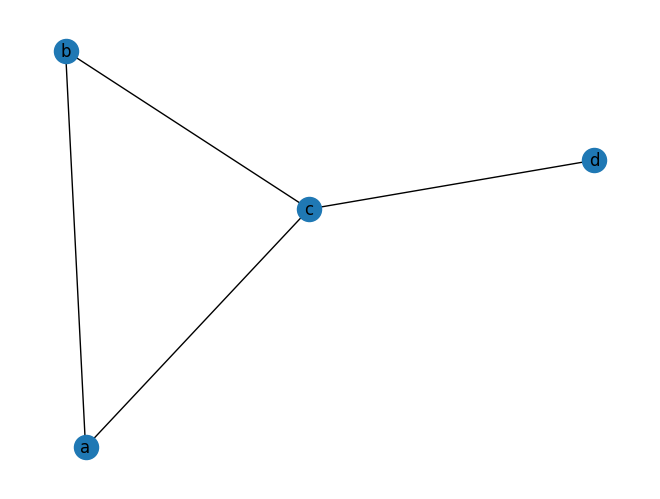

In [7]:
# add edge from 'a' to 'b'
# since this graph is undirected, the order doesn't matter here
G.add_edge('a', 'b')

# just like add_nodes_from, we can add edges from a sequence
# edges should be specified as 2-tuples
edges_to_add = [('a', 'c'), ('b', 'c'), ('c', 'd')]
G.add_edges_from(edges_to_add)

# draw the graph
nx.draw(G, with_labels=True)

There are many optional arguments to the draw function to customize the appearance.

In [8]:
help(nx.draw)

Help on function draw in module networkx.drawing.nx_pylab:

draw(G, pos=None, ax=None, **kwds)
    Draw the graph G with Matplotlib.
    
    Draw the graph as a simple representation with no node
    labels or edge labels and using the full Matplotlib figure area
    and no axis labels by default.  See draw_networkx() for more
    full-featured drawing that allows title, axis labels etc.
    
    Parameters
    ----------
    G : graph
        A networkx graph
    
    pos : dictionary, optional
        A dictionary with nodes as keys and positions as values.
        If not specified a spring layout positioning will be computed.
        See :py:mod:`networkx.drawing.layout` for functions that
        compute node positions.
    
    ax : Matplotlib Axes object, optional
        Draw the graph in specified Matplotlib axes.
    
    kwds : optional keywords
        See networkx.draw_networkx() for a description of optional keywords.
    
    Examples
    --------
    >>> G = nx.dodecahe

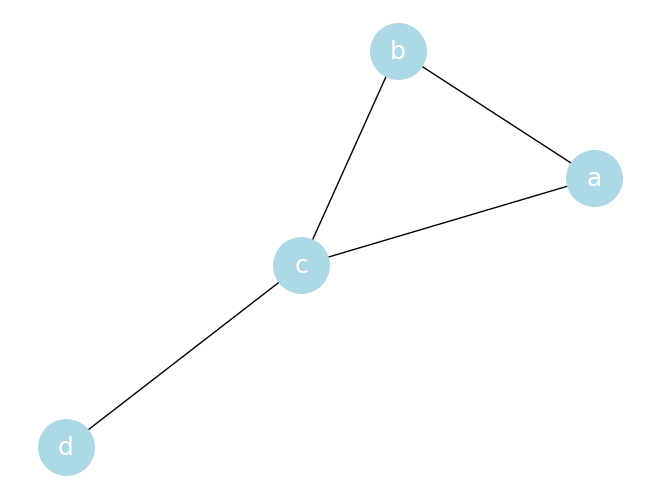

In [9]:
nx.draw(
    G,
    with_labels=True,
    node_color='lightblue',
    node_size=1600,
    font_color='white',
    font_size=18,
)

# A note on naming conventions

Usually in Python, variables are named in `snake_case`, i.e. lowercase with underscores separating words. Classes are conventionally named in `CamelCase`, i.e. with the first letter of each word capitalized.

Obviously NetworkX doesn't use this convention, often using single capital letters for the names of graphs. This is an example of convention leaking from the world of discrete mathematics. Since most of the documentation you will find online uses this convention, we will follow it as well.

# Graph methods

The graph object has some properties and methods giving data about the whole graph.

In [10]:
# List all of the nodes
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [11]:
# List all of the edges
G.edges()

EdgeView([('a', 'b'), ('a', 'c'), ('b', 'c'), ('c', 'd')])

NodeView and EdgeView objects have iterators, so we can use them in `for` loops:

In [12]:
for node in G.nodes():
    print(node)

a
b
c
d


In [13]:
for edge in G.edges():
    print(edge)

('a', 'b')
('a', 'c')
('b', 'c')
('c', 'd')


In [14]:
for (u, v) in G.edges():
    print(f'{u} {v}')

a b
a c
b c
c d


Note that the edges are given as 2-tuples, the same way we entered them.

We can get the number of nodes and edges in a graph using the `number_of_` methods.

In [15]:
G.number_of_nodes()

4

In [16]:
G.number_of_edges()

4

Some graph methods take an edge or node as argument. These provide the graph properties of the given edge or node. For example, the `.neighbors()` method gives the nodes linked to the given node:

In [17]:
# iterator of neighbors of node 'b'
G.neighbors('b')

For performance reasons, many graph methods return iterators instead of lists. They are convenient to loop over:

In [18]:
for neighbor in G.neighbors('b'):
    print(neighbor)

a
c


and you can always use the `list` constructor to make a list from an iterator:

In [19]:
list(G.neighbors('b'))

['a', 'c']

# NetworkX functions vs. Graph methods

The previous data are available via graph *methods*, *i.e.* they are called from the graph object:

    G.<method_name>(<arguments>)

While several of the most-used NetworkX functions are provided as methods, many more of them are module functions and are called like this:

    nx.<function_name>(G, <arguments>)

that is, with the graph provided as the first, and maybe only, argument. Here are a couple of examples of NetworkX module functions that provide information about a graph:

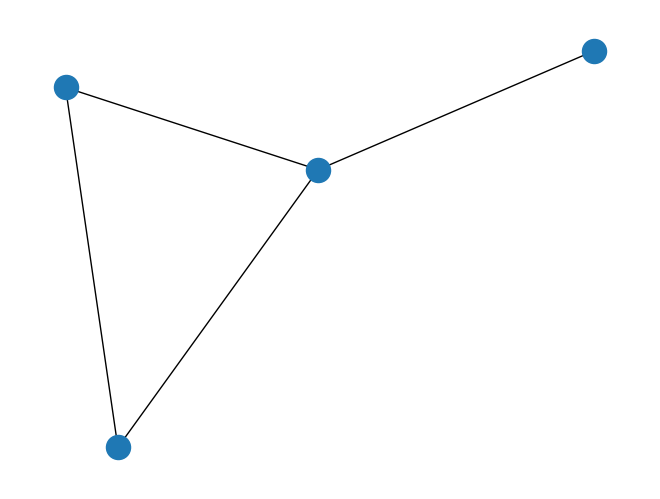

In [20]:
nx.draw(G)

# Node and edge existence

To check if a node is present in a graph, you can use the `has_node()` method:

In [21]:
G.has_node('a')

True

In [22]:
G.nodes()

NodeView(('a', 'b', 'c', 'd'))

In [23]:
G.has_node('x')

False

Additionally, the loop syntax used above: `for n in G.nodes` suggests another way we can check if a node is in a graph:

In [24]:
'd' in G.nodes()

True

Likewise we can check if two nodes are connected by an edge:

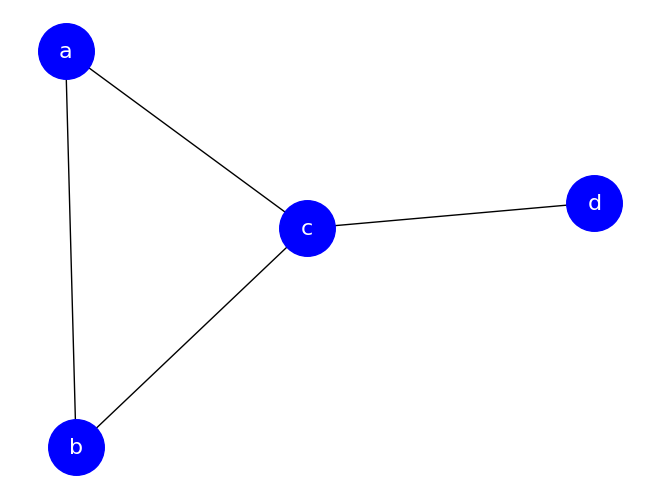

In [25]:
nx.draw(
    G,
    with_labels=True,
    node_color='blue',
    node_size=1600,
    font_color='white',
    font_size=16,
)

In [26]:
G.has_edge('a', 'b')

True

In [27]:
G.has_edge('a', 'd')

False

In [28]:
# ('c', 'd') in G.edges()
('d', 'c') in G.edges()

True

# Node degree

One of the most important questions we can ask about a node in a graph is how many other nodes it connects to. Using the `.neighbors()` method from above, we could formulate this question as so:

In [29]:
len(list(G.neighbors('a')))

2

In [30]:
len(list(G.neighbors('d')))

1

but this is such a common task that NetworkX provides us a graph method to do this in a much clearer way:

In [31]:
G.degree('a')

2

# Weighted graphs

NetworkX also supports weighted graphs. We can add edge weights during creation using the `weight` argument inside the `G.add_edge()` function.


In [32]:
W = nx.Graph()
W.add_edge(1, 2, weight=6)
W.add_weighted_edges_from([(4, 5, 3), (4, 6, 5)])

Edge weights are not displayed by default in the `edges()` function.

In [33]:
W.edges()

EdgeView([(1, 2), (4, 5), (4, 6)])

In [34]:
W.edges(data='weight')  # explicitly specify weights

EdgeDataView([(1, 2, 6), (4, 5, 3), (4, 6, 5)])

In [35]:
for (u, v, w) in W.edges(data='weight'):
    print(f'edge ({u}, {v}) with weight {w}')

edge (1, 2) with weight 6
edge (4, 5) with weight 3
edge (4, 6) with weight 5


# Strength
In a weighted network `W`, we define the _strength_ of node `i` (a.k.a. weighted degree) as the total weight of all links attached to `i`.

In NetworkX, the degree functions can be used to calculate node strengths by passing the parameter `weight='weight'`.


In [36]:
W = nx.Graph()
W.add_edge(1, 2, weight=6)
W.add_weighted_edges_from([(1, 3, 2),(2, 3, 5), (3, 4, 1)])

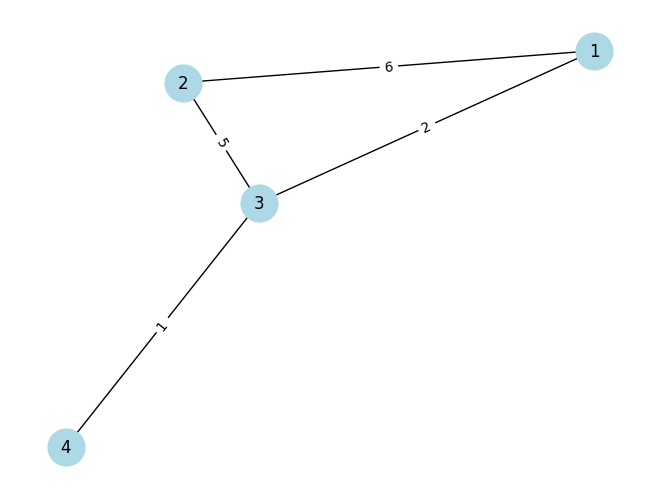

In [37]:
pos = nx.spring_layout(W, seed=4)

nx.draw(W, pos=pos, with_labels=True, node_color='lightblue', node_size=700);
nx.draw_networkx_edge_labels(
    W, pos=pos,
    edge_labels=nx.get_edge_attributes(W, 'weight')
);

In [38]:
nx.get_edge_attributes(W, 'weight')

{(1, 2): 6, (1, 3): 2, (2, 3): 5, (3, 4): 1}

The degree of node of node `2` is 2.

In [39]:
W.degree(2)

2

The strength of node of node `2` is 11.

In [40]:
W.degree(2, weight='weight')

11


# Breakout 1


## Q1. Consider two undirected networks $G$ and $H$ with the same number of nodes and links. Answer True or False for the following questions.
a. $G$ and $H$ have the same _maximum_ and _minimum_ degrees.

In [106]:
False

False

b. $G$ and $H$ have the same _average_ degree.

In [42]:
True

True

## Programming Challenge
A node with degree 1 is called a *leaf*. Write a function named `get_leaves` that takes a graph as an argument, loops through the nodes, and returns a list of nodes with degree 1.

In [43]:
def get_leaves(G):
    """
    Identify and return a list of leaf nodes in a graph.

    Parameters:
    -----------
    G (nx.Graph): A NetworkX graph.

    Returns:
    -----------
    list: A list of nodes with degree 1 (leaf nodes).
    """
    leaves = []

    for n in G.nodes():
      if G.degree(n) == 1:
        leaves.append(n)

    return leaves

In [44]:
G = nx.Graph()
G.add_edges_from([
        ('a', 'b'),
        ('a', 'd'),
        ('c', 'd'),
    ])
found_leaves = set(get_leaves(G))
print(f"The leaves have have been found are: {found_leaves}")
assert found_leaves == {'c', 'b'}

The leaves have have been found are: {'b', 'c'}


In [45]:
get_leaves(G)

['b', 'c']

---------------

# Subnetwork / subgraphs

A proper subnetwork or a proper subgraph is a network obtained by selecting a subset of the nodes and all of the links among these nodes.
By default, networkx creates proper subraphs.

A clique is a complete subnetwork.


In [46]:
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (1, 3), (1, 4)])

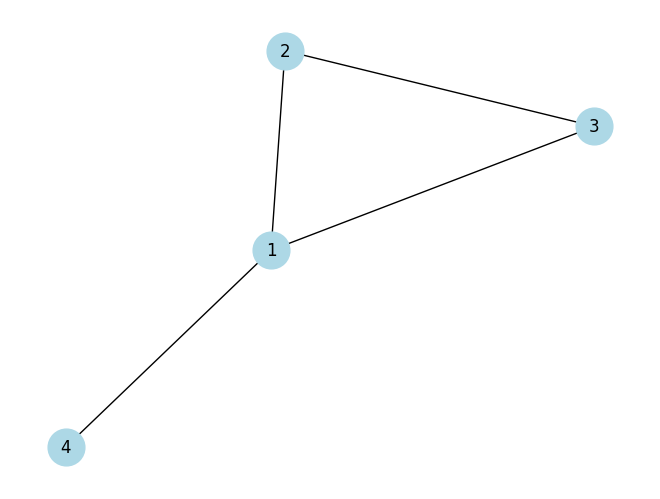

In [47]:
nx.draw(G, with_labels=True, node_color='lightblue', node_size=700)

From network `G`, we can construct a subgraph `S` using the `nx.subgraph()` function.

For example, the subgraph `S` induced by nodes `{1, 2, 3}` is a 3-clique.

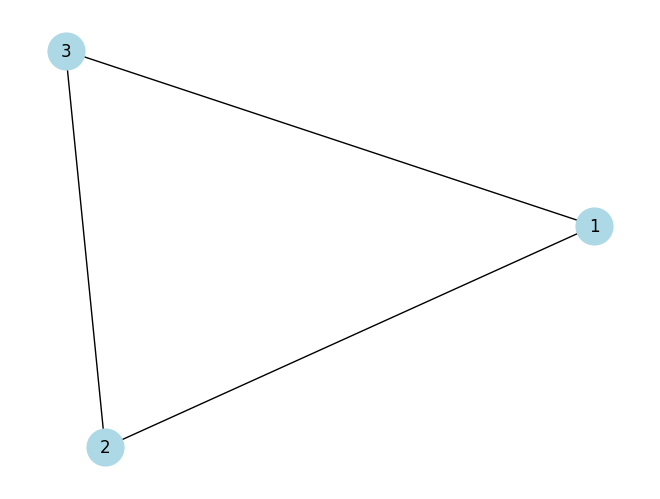

In [48]:
S = nx.subgraph(G, {1, 2, 3})
nx.draw(S, with_labels=True, node_color='lightblue', node_size=700);

# Network Density

The function `nx.density()` returns the density of a NetworkX graph.

Cliques have a density of 1.

In [49]:
print(f'Density of network G: {nx.density(G):.3f}')
print(f'Density of (sub)network S: {nx.density(S)}')

Density of network G: 0.667
Density of (sub)network S: 1.0


# Aside: comprehensions

Often we have one sequence of values and we want to generate a new sequence by applying an operation to each item in the first. List comprehensions and generator expressions are compact ways to do this.

List comprehensions are specified inside square brackets, and immediately produce a list of the result.

In [50]:
items = ['spider', 'y', 'banana']
[item.upper() for item in items]

['SPIDER', 'Y', 'BANANA']

In [51]:
###
items_upper = []
for item in items:
    items_upper.append(item.upper())

###
items_upper = [item.upper() for item in items]

In [52]:
for item in items:
    print(item.upper())

SPIDER
Y
BANANA


In the context of NetworkX, this is often used to do something with the node or edge lists:

In [53]:
print(G.nodes())
print([G.degree(n) for n in G.nodes])

[1, 2, 3, 4]
[3, 2, 2, 1]


In [54]:
G.degree()

DegreeView({1: 3, 2: 2, 3: 2, 4: 1})

In [55]:
dict(G.degree())

{1: 3, 2: 2, 3: 2, 4: 1}

Generator expressions are slightly different as they are evaluated [lazily](https://en.wikipedia.org/wiki/Lazy_evaluation). These are specified using round braces, and if they are being expressed as a function argument, they can be specified without any braces. These are most often used in the context of aggregations like the `max` function:

In [56]:
items

['spider', 'y', 'banana']

In [57]:
g = [len(item) for item in items]
g

[6, 1, 6]

In [58]:
max(len(item) for item in items)

6

In [59]:
g = (len(item) for item in items)
g

<generator object <genexpr> at 0x7e92e41c40b0>

In [60]:
[len(item) for item in items]

[6, 1, 6]

In [61]:
max(g)

6

In [62]:
# generator is empty because we already "used" it
# max(g)

In [63]:
# Another example of how the generator expression can be used in a function
sorted(item.upper() for item in items)

['BANANA', 'SPIDER', 'Y']

# Node names

The node names don't have to be single characters -- they can be strings or integers or any immutable object, and the types can be mixed. The example below uses strings and integers for names.

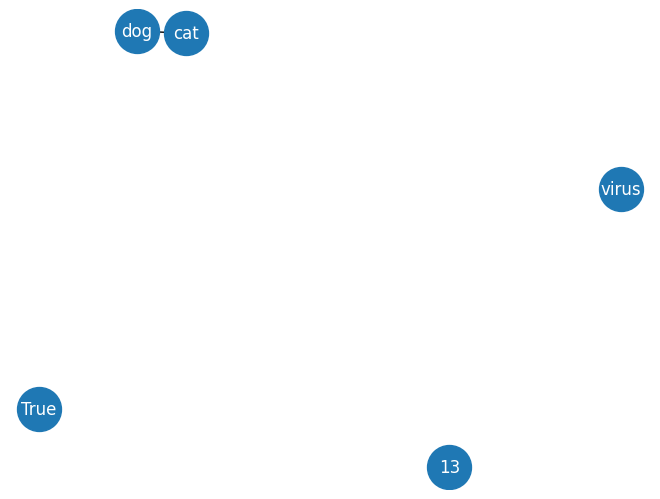

In [64]:
G = nx.Graph()

G.add_nodes_from(['cat', 'dog', 'virus', 13, True])

G.add_edge('cat','dog')

nx.draw(G, with_labels=True, font_color='white', node_size=1000)

In [65]:
G.has_node(13), G.has_node('13')

(True, False)

In [66]:
G.degree(13)

0

In [67]:
G.degree('13')

DegreeView({})

In [68]:
G.degree('cat')

1

# Directed graphs

Unless otherwise specified, we assume graph edges are undirected -- they are symmetric and go both ways. But some relationships, e.g. predator-prey relationships, are asymmetric and best represented as directed graphs. NetworkX provides the `DiGraph` class for directed graphs.

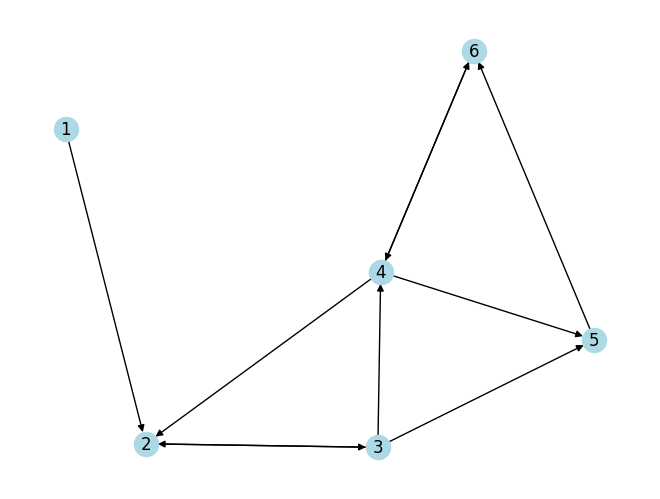

In [69]:
D = nx.DiGraph()

D.add_edges_from([(1,2), (2,3), (3,2), (3,4), (3,5), (4,5), (4,6), (5,6), (6,4), (4,2)])

nx.draw(D, with_labels=True, node_color='lightblue')

Note the asymmetry in graph methods dealing with edges such as `has_edge()`:

In [70]:
D.has_edge(1, 2)

True

In [71]:
D.has_edge(2, 1)

False

Instead of the symmetric relationship "neighbors", nodes in directed graphs have predecessors ("in-neighbors") and successors ("out-neighbors"):

In [72]:
print('Successors of 2:', list(D.successors(2)))
print('Predecessors of 2:', list(D.predecessors(2)))

Successors of 2: [3]
Predecessors of 2: [1, 3, 4]


Directed graphs have in-degree and out-degree, giving the number of edges pointing to and from the given node, respectively:

In [73]:
D.in_degree(2)

3

In [74]:
D.out_degree(2)

1

### Caveat

Since NetworkX 2, the `.degree()` method on a directed graph gives the total degree: in-degree plus out-degree. However, in a bit of confusing nomenclature, the `neighbors` method is a synonym for `successors`, giving only the edges originating from the given node. This makes sense if you consider `neighbors` to be all the nodes reachable from the given node by following links, but it's easy to make the mistake of writing `.neighbors()` in your code when you really want both predecessors and successors.

In [75]:
D.degree(2)

4

In [76]:
print('Successors of 2:', list(D.successors(2)))
print('"Neighbors" of 2:', list(D.neighbors(2)))

Successors of 2: [3]
"Neighbors" of 2: [3]


## Converting a Directed Graph to an Undirected Graph
A directed NetworkX graph (DiGraph) can be transformed into an undirected Graph.

In [77]:
D
print(D)

DiGraph with 6 nodes and 10 edges


In [78]:
UD = D.to_undirected()
print(UD)

Graph with 6 nodes and 8 edges


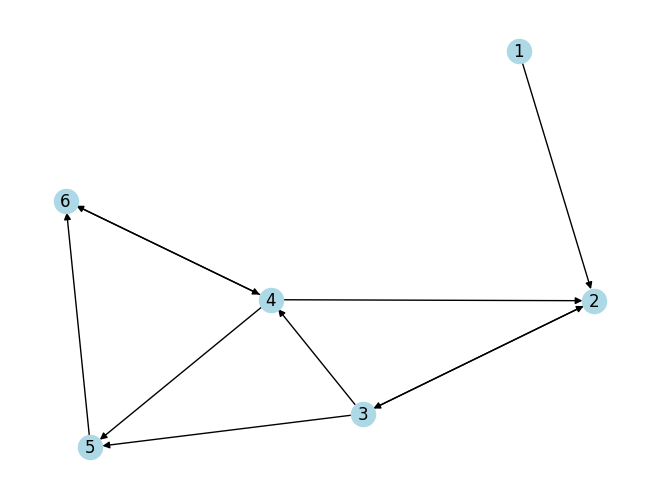

In [79]:
nx.draw(D, with_labels=True, node_color='lightblue')

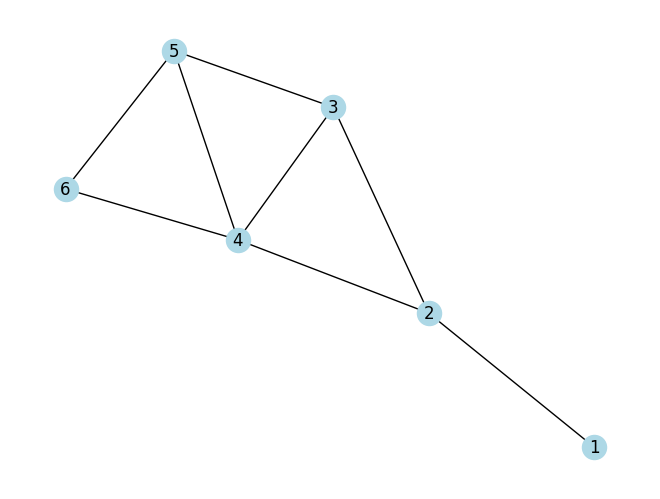

In [80]:
nx.draw(UD, with_labels=True, node_color='lightblue')

# Network representations

## Adjacency lists

One compact way to represent a graph is an adjacency list. This is most useful for unweighted graphs, directed or undirected. In an adjacency list, each line contains some number of node names. The first node name is the "source" and each other node name on the line is a "target". For instance, given the following adjacency list:
```
a d e
b c
c
d
e
```
the edges are as follows:
```
(a, d)
(a, e)
(b, c)
```
The nodes on their own line exist so that we are sure to include any singleton nodes. Note that if our graph is undirected, we only need to specify one direction for each edge. Importantly, whether the graph is directed or undirected is often not contained in the file itself -- you have to infer it. This is one limitation of the format.

Download the `friends.adjlist` file from the [FirstCourseNetworkScience](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience/datasets) git repo.

In [81]:
! wget -O friends.adjlist https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/friends.adjlist

--2024-06-05 18:25:02--  https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/friends.adjlist
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109 [text/plain]
Saving to: ‘friends.adjlist’

friends.adjlist     100%[===================>]     109  --.-KB/s    in 0s      

2024-06-05 18:25:03 (6.23 MB/s) - ‘friends.adjlist’ saved [109/109]



In [82]:
# Set the file path
file_path = "./friends.adjlist"

# Open
with open(file_path, 'r') as file:
    content = file.read()

print("Data")
print("-----")
print(content)

Data
-----
George Frank Dennis
Dennis Claire Esther
Claire Frank Alice Esther
Bob Alice
Frank Alice
Alice
Esther
Shelly



NetworkX provides a way to read a graph from an adjacency list: `nx.read_adjlist()`. We will name this graph `SG`, for social graph.

In [83]:
SG = nx.read_adjlist('./friends.adjlist')
print(SG)

Graph with 8 nodes and 9 edges


In [84]:
SG.nodes()

NodeView(('George', 'Frank', 'Dennis', 'Claire', 'Esther', 'Alice', 'Bob', 'Shelly'))

In [85]:
SG.edges()

EdgeView([('George', 'Frank'), ('George', 'Dennis'), ('Frank', 'Claire'), ('Frank', 'Alice'), ('Dennis', 'Claire'), ('Dennis', 'Esther'), ('Claire', 'Alice'), ('Claire', 'Esther'), ('Alice', 'Bob')])

We know how to draw this graph:

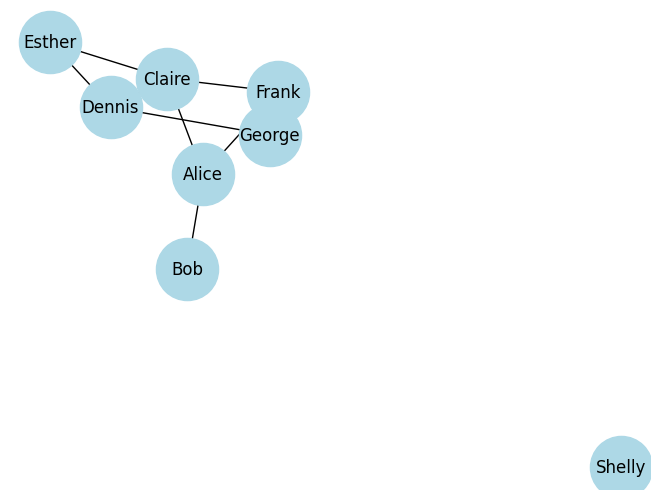

In [86]:
nx.draw(SG, node_size=2000, node_color='lightblue', with_labels=True)

And we know how to get information such as the number of friends linked from a node:

In [87]:
SG.degree('Alice')

3

## Edge lists

An alternative way to represent a graph is via an edge list. In an edge list, each line contains a `(source, target)` pair for unweighted graphs or a triple `(source, target, weight)` for weighted graphs.

Edges are typically assumed to be directional. So, for undirected networks, each edge `(u, v)` is repeated twice in the edge list, as `u, v` and `v, u` respectively.

NetworkX can directly read both unweighted and weighted edgelists using the `nx.read_edgelist` and `nx.read_weighted_edgelist` functions.

As an example, let's read the `c. elegans` network. You can access the data through the [FirstCourseNetworkScience](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience) git repo.


In [88]:
%%capture out
! wget -O celegans.edges https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/celegansneural/celegansneural.edges

Let's take a look at the data first before we decide which method for reading


In [89]:
! head celegans.edges

# Directed, weighted
135 1 3
202 1 2
1 2 1
8 2 1
17 2 6
102 2 1
103 2 4
109 2 9
114 2 11


**Now** we see the structure of edge data, where the first two columns refer to nodes and the third column refers to the weight of the corresponding edge. It should be noted that the first column stores the outcoming nodes, while the second column stores the incoming nodes.

In [90]:
G = nx.read_weighted_edgelist('./celegans.edges', create_using=nx.DiGraph)
print(G)

DiGraph with 297 nodes and 2345 edges


It should be noted that the type of node name, in this case, is a string instead of int.

In [91]:
list(G.nodes())[: 5]

['135', '1', '202', '2', '8']

In [92]:
G.has_edge('135', '1')

True

In [93]:
G.has_edge('1', '135')

False

In [94]:
G.has_edge(135, 1)

False

In [95]:
G.has_edge(1, 135)

False

In [96]:
G['135']['1']

{'weight': 3.0}

# Breakout 2
For the following questions, let's use the `c. elegans` network. You can access the data through the [FirstCourseNetworkScience](https://github.com/CambridgeUniversityPress/FirstCourseNetworkScience) git repo.


In [97]:
%%capture out
! wget -O celegans.edges https://raw.githubusercontent.com/CambridgeUniversityPress/FirstCourseNetworkScience/master/datasets/celegansneural/celegansneural.edges

In [98]:
G = nx.read_weighted_edgelist('./celegans.edges', create_using=nx.DiGraph)
print(G)

DiGraph with 297 nodes and 2345 edges


## Q1. How many nodes and links are in the network G?

In [99]:
print(f'Nodes: {len(G.nodes)}')
print(f'Edges: {len(G.edges)}')

Nodes: 297
Edges: 2345


## Q2. What is the density of network G?

In [100]:
nx.density(G)

0.026674401674401674

## Q3. Please show the node with the largest in-degree and the node with the largest out-degree.

In [101]:
print(f'Largest in-degree node: {sorted(G.in_degree, key=lambda x: x[1], reverse=True)[0][0]}')
print(f'Largest out-degree node: {sorted(G.out_degree, key=lambda x: x[1], reverse=True)[0][0]}')

Largest in-degree node: 45
Largest out-degree node: 3


## Q4. Please show the node with the largest in-strength, and the one with the largest out-strength.

In [102]:
in_strength = G.in_degree(weight='weight')
out_strength = G.out_degree(weight='weight')

print(f'Largest in-strength node: {sorted(in_strength, key=lambda x: x[1], reverse=True)[0][0]}')
print(f'Largest out-strength node: {sorted(out_strength, key=lambda x: x[1], reverse=True)[0][0]}')

Largest in-strength node: 45
Largest out-strength node: 3


## Q5. Please calculate the average in-degree and average out-degree of the network G.

In [103]:
in_degrees = list(dict(G.in_degree()).values())
out_degrees = list(dict(G.out_degree()).values())
print(f'The average of in-degree: {sum(in_degrees) / len(in_degrees)}')
print(f'The average of out-degree: {sum(out_degrees) / len(out_degrees)}')

The average of in-degree: 7.895622895622895
The average of out-degree: 7.895622895622895


## Q6. Are there any nodes with zero in-degree? If so, how many?

In [104]:
list(dict(G.in_degree()).values()).count(0)

27

## Q7. Are there any nodes with zero out-degree? If so, how many?

In [105]:
list(dict(G.out_degree()).values()).count(0)

3

------ End of Hands-on Exercise 1 -------

# Submission URL: https://forms.gle/tJExtKjqjMVk6AKKA